# 패키지 불러오기

In [41]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
gpd.__version__

'0.6.1'

In [42]:
import folium
folium.__version__

import sys

In [43]:
import matplotlib
# 한글 깨짐 방지
matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic')
# Mac OS인 경우에는 AppleGothic 추가
matplotlib.rcParams['font.family']

['Malgun Gothic', 'Malgun Gothic', 'Malgun Gothic', 'sans-serif']

In [44]:
import warnings
warnings.filterwarnings(action='ignore') #경고 메시지 무시

In [45]:
import fiona

# 데이터 불러오기

In [46]:
file = "4개지역_행정동.SHP"
file2 = "EMD.SHP"

In [47]:
district = pd.read_excel("district2.xlsx")
result = pd.read_excel("result2.xlsx")
dong = gpd.read_file(file2, encoding='cp949')
geo = gpd.read_file(file, encoding='cp949')

# 데이터 전처리

In [48]:
# 동 코드 앞의 두 자리만 불러오는 함수
def grap_year(data):
    data = str(data)
    return int(data[:2])

In [49]:
# 앞의 두 자리만 불러오기 적용
dong["EMD_CD_2"] = dong['EMD_CD'].apply(lambda x: grap_year(x))

In [50]:
# 서울 동 코드는 11로 시작
seoul_geo = dong[dong["EMD_CD_2"]==11]
# 대구 동 코드는 2로 시작
daegu_geo = dong[dong["EMD_CD_2"]==27]

In [51]:
# 동 column 이름 통일
dong = seoul_geo.rename({"EMD_KOR_NM":"행정동명"}, axis='columns')
dong_daegu = daegu_geo.rename({"EMD_KOR_NM":"행정동명"}, axis='columns')
geo = geo.rename({"HDONG_NM":"행정동명"}, axis='columns')

In [52]:
# 데이터 병합 후 하나의 데이터로
merge = pd.merge(geo, district, how='inner')
merge = pd.merge(merge, result, how='inner')

In [53]:
# 서울, 대구 지역별로 분리
merge_daegu = merge[merge["SIDO_NM"] == "대구광역시"]
merge_seoul = merge[merge["SIDO_NM"] == "서울특별시"]

In [57]:
# 서울의 결과값 분리
merge_seoul_x = merge_seoul[merge_seoul["result"] == "X"]
merge_seoul_all = merge_seoul[merge_seoul["result"] == "O"]
merge_seoul_gudok = merge_seoul[merge_seoul["result"] == "구독경제"]
merge_seoul_gudok_n = merge_seoul[merge_seoul["result"] == "구독경제(N)"]
merge_seoul_drive = merge_seoul[merge_seoul["result"] == "드라이브 스루"]
merge_seoul_drive_n = merge_seoul[merge_seoul["result"] == "드라이브 스루(N)"]

In [58]:
# 대구의 결과값 분리
merge_daegu_x = merge_daegu[merge_daegu["result"] == "X"]
merge_daegu_all = merge_daegu[merge_daegu["result"] == "O"]
merge_daegu_gudok = merge_daegu[merge_daegu["result"] == "구독경제"]
merge_daegu_gudok_n = merge_daegu[merge_daegu["result"] == "구독경제(N)"]
merge_daegu_drive = merge_daegu[merge_daegu["result"] == "드라이브 스루"]
merge_daegu_drive_n = merge_daegu[merge_daegu["result"] == "드라이브 스루(N)"]

# 지도 시각화

### 주변 지도 있는 버전

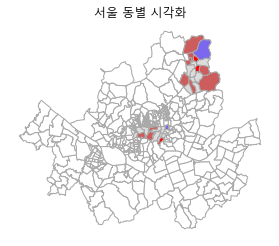

In [59]:
# 서울 시각화
ax = dong.plot(legend=True, categorical=True,color='w', edgecolor='darkgrey')
ax.set_title("서울 동별 시각화")
merge_seoul_x.plot(ax=ax, column="result", legend=True, categorical=True, color="gainsboro", edgecolor="darkgray")
merge_seoul_all.plot(ax=ax, column="result", legend=True, categorical=True, color="mediumslateblue", edgecolor="darkgray")
merge_seoul_gudok.plot(ax=ax, column="result", legend=True, categorical=True, color="red", edgecolor="darkgray")
merge_seoul_gudok_n.plot(ax=ax, column="result", legend=True, categorical=True, color="indianred", edgecolor="darkgray")
merge_seoul_drive.plot(ax=ax, column="result", legend=True, categorical=True, color="mediumblue", edgecolor="darkgray")
merge_seoul_drive_n.plot(ax=ax, column="result", legend=True, categorical=True, color="cornflowerblue", edgecolor="darkgray")
ax.set_axis_off()
plt.show()



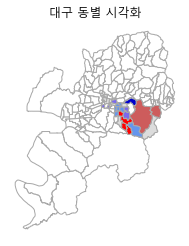

In [60]:
# 대구 시각화
ax = dong_daegu.plot(legend=True, categorical=True,color='w', edgecolor='darkgrey')
ax.set_title("대구 동별 시각화")
merge_daegu_x.plot(ax=ax, column="result", legend=True, categorical=True, color="gainsboro", edgecolor="darkgray")
merge_daegu_all.plot(ax=ax, column="result", legend=True, categorical=True, color="mediumslateblue", edgecolor="darkgray")
merge_daegu_gudok.plot(ax=ax, column="result", legend=True, categorical=True, color="red", edgecolor="darkgray")
merge_daegu_gudok_n.plot(ax=ax, column="result", legend=True, categorical=True, color="indianred", edgecolor="darkgray")
merge_daegu_drive.plot(ax=ax, column="result", legend=True, categorical=True, color="mediumblue", edgecolor="darkgray")
merge_daegu_drive_n.plot(ax=ax, column="result", legend=True, categorical=True, color="cornflowerblue", edgecolor="darkgray")
ax.set_axis_off()
plt.show()

### 주변 지도 없는 버전

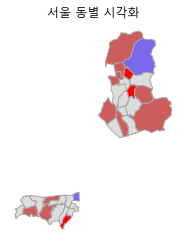

In [61]:
ax = merge_seoul_x.plot(column="result", legend=True, categorical=True, color="gainsboro", edgecolor="darkgray")
ax.set_title("서울 동별 시각화")
merge_seoul_all.plot(ax=ax, column="result", legend=True, categorical=True, color="mediumslateblue", edgecolor="darkgray")
merge_seoul_gudok.plot(ax=ax, column="result", legend=True, categorical=True, color="red", edgecolor="darkgray")
merge_seoul_gudok_n.plot(ax=ax, column="result", legend=True, categorical=True, color="indianred", edgecolor="darkgray")
merge_seoul_drive.plot(ax=ax, column="result", legend=True, categorical=True, color="mediumblue", edgecolor="darkgray")
merge_seoul_drive_n.plot(ax=ax, column="result", legend=True, categorical=True, color="cornflowerblue", edgecolor="darkgray")
ax.set_axis_off()
plt.show()

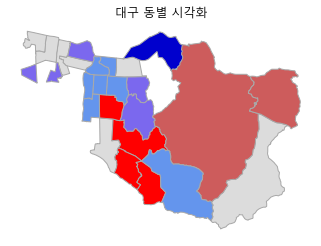

In [62]:
# 대구 시각화
ax = merge_daegu_x.plot(column="result", legend=True, categorical=True, color="gainsboro", edgecolor="darkgray")
ax.set_title("대구 동별 시각화")
merge_daegu_all.plot(ax=ax, column="result", legend=True, categorical=True, color="mediumslateblue", edgecolor="darkgray")
merge_daegu_gudok.plot(ax=ax, column="result", legend=True, categorical=True, color="red", edgecolor="darkgray")
merge_daegu_gudok_n.plot(ax=ax, column="result", legend=True, categorical=True, color="indianred", edgecolor="darkgray")
merge_daegu_drive.plot(ax=ax, column="result", legend=True, categorical=True, color="mediumblue", edgecolor="darkgray")
merge_daegu_drive_n.plot(ax=ax, column="result", legend=True, categorical=True, color="cornflowerblue", edgecolor="darkgray")
ax.set_axis_off()
plt.show()